#My 3-Layer CNN on CIFAR-10

**Objectives**
*   Compare the performance of 3-Layer CNN and 3-Layer MLP on the CIFAR-10 Dataset
*   Practice coding with Keras, specifically Keras Functional API

**Changelog**
*   Created My 3-Layer CNN on CIFAR-10 [3/7/2019]. Achieved Test Accuracy of --> 76.32%
*   Retrained. Achieved Test Accuracy of -->75.73% [OVERFITTING]
*   Noticed model was overfitting (train acc >> test acc), after around 15 epochs. Changed epochs from 25 --> 15, batch size 32 --> 128 because I noticed increasing batch size for CIFAR-10 increases accuracy. Accuracy now at -->75.67% [3/9/2018]
*   Added line graphs for train vs validation accuracy and loss to better visualize over/underfitting.

Training Data Shape: (45000, 32, 32, 3)
Validation Data Shape: (5000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout_27 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________

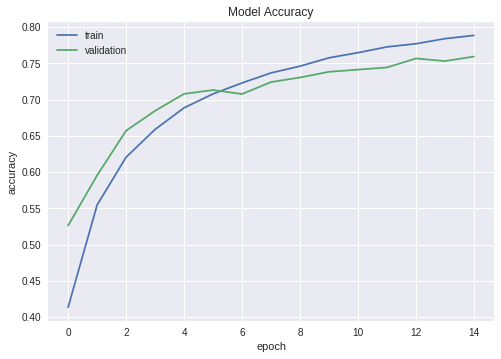

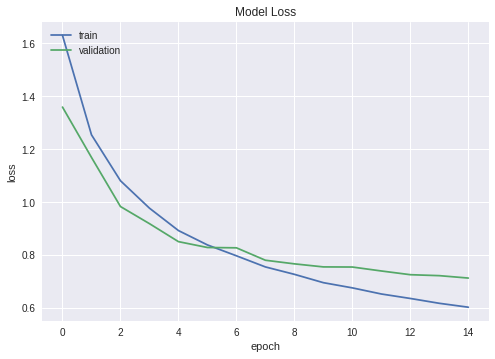

In [15]:
import numpy as np
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten

from keras.constraints import maxnorm
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras import backend as K
import matplotlib.pyplot as plt

"""
Sci-kit's train_test_split() shuffles then splits training pool into 
training data and validation data
"""
from sklearn.model_selection import train_test_split

#Fix a random seed for reproducibility
np.random.seed(1)

#Load Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

#Convert from sparse label to Categorical (one-hot vector)
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

#Reshape and Normalize Input Images

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_valid = x_valid.astype('float32') / 255

#.shape attributes contained in a tuple: (len of list, height, width, rgb=3)
print("Training Data Shape: {}".format(x_train.shape))
print("Validation Data Shape: {}".format(x_valid.shape))
print("Test Data Shape: {}".format(x_test.shape))

# Network Parameters
input_shape = (32, 32, 3) #Tensorflow format: (Height, Width, rgb=3)
batch_size = 128
epochs = 15

filters = 64
dropout = 0.3
padding = 'same' #zero padding
kernel_size = (3,3)

# CNN Layers (functional API)
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters, 
           kernel_size=kernel_size, 
           input_shape=input_shape, 
           padding=padding, 
           activation='relu')(inputs)
y = Dropout(dropout)(y)

y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           padding=padding,
           activation='relu')(y)
y = MaxPooling2D(pool_size=(2,2))(y)

y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           padding=padding,
           activation='relu')(y)
y = MaxPooling2D(pool_size=(2,2))(y)
y = Flatten()(y)
y = Dropout(dropout)(y)

outputs = Dense(num_labels, activation='softmax')(y)

#Build the Model, Show Summary
model = Model(inputs=inputs, outputs=outputs)
model.summary()

#Set Loss Function, Optimizer, and Accuracy Metric
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Train the model with input images and labels
history = model.fit(x_train, y_train, 
          validation_data=(x_valid, y_valid), 
          epochs=epochs,
          batch_size=batch_size)

#Final Accuracy on Test Data Set
scores = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest Accuracy: %.2f%%" % (100.0 * scores[1])) 

#Plot validation vs training accuracy
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Plot validation vs training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()